# **AIR CRASHES DATA ANALYSIS**

**                       **
## RESEARCH QUESTIONS

#### 1. Number of Air crashes per year.
#### 2. What is the trend of air crashes over time?
#### 3. Which countries recorded the highest number of crashes?
#### 4. Which aircraft manufacturers are most involved in crashes?
#### 5. What is the average fatality rate by operator type?
#### 6. Which operators recorded the most crashes?
#### 7. Which quarter of the year has the most crashes?
#### 8. What is the total number of people aboard vs fatalities?
#### 9. Which decade recorded the highest fatalities?
#### 10. What are the top 10 deadliest crashes?



**                        **


## Data preparation and cleaning 

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import scipy.stats as stats 

In [57]:
# loading the dataset

df = pd.read_excel("Aircrashes_Data_Cleaning.xlsx")

In [58]:
df.sample()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Operator Type,Ground,Fatalities(air),Aboard,Fatality Rate(%)
4715,2008,4,11,16,British,Grumman,Grumman G 21A Goosec,Thormanby Island British,Canada Columbia Pacific Coastal Airlines,Unknown,0,7,8,87.5


In [59]:
df.shape

(5035, 14)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   5035 non-null   int64  
 1   Quarter                5035 non-null   int64  
 2   Month                  5035 non-null   int64  
 3   Day                    5035 non-null   int64  
 4   Country/Region         5035 non-null   object 
 5   Aircraft Manufacturer  5035 non-null   object 
 6   Aircraft               5035 non-null   object 
 7   Location               5035 non-null   object 
 8   Operator               5035 non-null   object 
 9   Operator Type          5035 non-null   object 
 10  Ground                 5035 non-null   int64  
 11  Fatalities(air)        5035 non-null   int64  
 12  Aboard                 5035 non-null   int64  
 13  Fatality Rate(%)       5013 non-null   float64
dtypes: float64(1), int64(7), object(6)
memory usage: 550.8+ 

In [61]:
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Operator Type,Ground,Fatalities(air),Aboard,Fatality Rate(%)
0,1908,3,9,17,Virginia,Wright Flyer,Wright Flyer Iii,Fort Myer Virginia,Army U.S.,Military,0,1,2,50.0
1,1909,3,9,7,France,Wright,Wright Byplanesc1,JuvisysurOrge France,Unknown,Unknown,0,1,1,100.0
2,1912,3,7,12,New,Dirigible,Dirigible,Atlantic City New,Navy U.S.,Jerseymilitary,0,5,5,100.0
3,1913,3,8,6,British,Curtiss,Curtiss Seaplane,Victoria British,Canada Columbia Private,Unknown,0,1,1,100.0
4,1913,3,9,9,Unknown,Zeppelin,Zeppelin L 1,Over the North SeaMilitary German Navy,Unknown,Unknown,0,14,20,70.0


#### cleaning the  object column values for consistency

In [62]:
import re

# Replace common "missing" placeholders with NaN
df.replace(
    to_replace=[r'^\s*$', r'^\s*N/A\s*$', r'^\s*na\s*$', r'^\s*-\s*$'],
    value=np.nan,
    regex=True,
    inplace=True
)

# Clean spaces and format strings
df = df.apply(
    lambda col: col.map(
        lambda x: re.sub(r'\s+', ' ', x.strip()).title()
        if isinstance(x, str) and pd.notnull(x)
        else x
)
)

In [63]:
df[["Location", "Country/Region", "Operator"]].isnull().sum()


Location          0
Country/Region    0
Operator          0
dtype: int64

#### Cleaning the N/A, NAN entries in "Country/Region", "Operator" columns

In [64]:
df[df["Country/Region"].isnull()][['Location', "Country/Region", "Aircraft Manufacturer" , "Aircraft","Location","Operator" ]].isnull()

,Location,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator


In [65]:
df["Country/Region"].unique()

array(['Virginia', 'France', 'New', 'British', 'Unknown', 'Germany',
       'Belgium', 'Bulgeria', 'England', 'North', 'Ohio', 'Pennsylvania',
       'Illinois', 'Italy', 'Maryland', 'Kent', 'Surrey', 'Indiana',
       'Iowa', 'Columbia', 'Spain', 'Wyoming', 'Minnisota', 'Wisconsin',
       'Nevada', 'Australia', 'Nyus', 'China', 'Lorraine', 'Italyde',
       'Morocco', 'Picrdie', 'Romania', 'United', 'Buckinghamshire',
       'Wyus', 'Colombia', 'Georgia', 'Hungary', 'Mauritania',
       'Czechoslovakia', 'Oregon', 'Qld', 'Idaho', 'Algeria',
       'Connecticut', 'Airlines', 'Uruguay', 'Ariège', 'Nebraska',
       'Brazil_X000D_ Florianopolis', 'Minnesota', 'Kansas',
       'Netherlands', 'Bc', 'Texas', 'Condor', 'Washington', 'Tennessee',
       'Greece', 'West', 'California', 'Mexico', 'Cuba', 'Bavaria',
       'Russia', 'Near', 'Iran', 'Ontario', 'East', 'Madagascar',
       'Missouri', 'Argentina', 'Massachusetts', 'Denmark', 'Alberta',
       'Brazil', 'Manitoba', 'Burma', 'Bulga

In [66]:
df["Operator"].unique()

array(['Army U.S.', 'Unknown', 'Navy U.S.', ...,
       'Northwestern Air Lease Ltd', 'Alaska Air Fuel',
       'Singapore Airllines'], dtype=object)

In [68]:
import re
import pandas as pd

# 1️⃣ Master list of countries (for matching against Location)
COUNTRIES = [
    "Afghanistan","Algeria","Angola","Argentina","Australia","Austria","Bahamas",
    "Bangladesh","Belgium","Belize","Benin","Bolivia","Botswana","Brazil","Bulgaria",
    "Burkina Faso","Cambodia","Cameroon","Canada","Central African Republic","Chad",
    "Chile","China","Colombia","Comoros","Congo","Democratic Republic of the Congo",
    "Costa Rica","Croatia","Cuba","Cyprus","Czech Republic","Denmark","Djibouti",
    "Dominican Republic","Ecuador","Egypt","El Salvador","Equatorial Guinea","Eritrea",
    "Estonia","Ethiopia","Fiji","Finland","France","Gabon","Gambia","Georgia","Germany",
    "Ghana","Greece","Guatemala","Guinea","Guinea-Bissau","Guyana","Haiti","Honduras",
    "Hungary","Iceland","India","Indonesia","Iran","Iraq","Ireland","Israel","Italy",
    "Ivory Coast","Jamaica","Japan","Jordan","Kazakhstan","Kenya","Kuwait","Kyrgyzstan",
    "Laos","Latvia","Lebanon","Lesotho","Liberia","Libya","Lithuania","Luxembourg",
    "Madagascar","Malawi","Malaysia","Maldives","Mali","Malta","Mauritania","Mauritius",
    "Mexico","Moldova","Mongolia","Morocco","Mozambique","Myanmar","Namibia","Nepal",
    "Netherlands","New Zealand","Nicaragua","Niger","Nigeria","North Korea","Norway",
    "Oman","Pakistan","Panama","Papua New Guinea","Paraguay","Peru","Philippines","Poland",
    "Portugal","Qatar","Romania","Russia","Rwanda","Saudi Arabia","Senegal","Serbia",
    "Sierra Leone","Singapore","Slovakia","Slovenia","Solomon Islands","Somalia",
    "South Africa","South Korea","Spain","Sri Lanka","Sudan","Suriname","Swaziland",
    "Sweden","Switzerland","Syria","Taiwan","Tajikistan","Tanzania","Thailand","Togo",
    "Trinidad and Tobago","Tunisia","Turkey","Turkmenistan","Uganda","Ukraine",
    "United Arab Emirates","United Kingdom","United States","Uruguay","Uzbekistan",
    "Vanuatu","Venezuela","Vietnam","Yemen","Zambia","Zimbabwe"
]

# 2️⃣ Dictionary to standardize operator names
OPERATOR_MAP = {
    "british overseas airways": "British Overseas Airways Corporation",
    "air france": "Air France",
    "united airlines": "United Airlines",
    "u.s. air force": "U.S. Air Force",
    "u.s. navy": "U.S. Navy",
    "pan american": "Pan American World Airways",
    "aeroflot": "Aeroflot",
    "petroleum helicopter": "Petroleum Helicopters Inc.",
    "klm royal dutch": "KLM Royal Dutch Airlines",
    # extend as needed...
}

# 3️⃣ Helper to extract country from Location text
def extract_country(location: str) -> str | None:
    if pd.isna(location):
        return None
    for country in COUNTRIES:
        if re.search(rf"\b{re.escape(country)}\b", str(location), flags=re.IGNORECASE):
            return country
    return None

# 4️⃣ Helper to extract standardized operator from Location text
def extract_operator(location: str) -> str | None:
    if pd.isna(location):
        return None
    text = str(location).lower()
    for alias, standard in OPERATOR_MAP.items():
        if re.search(rf"\b{re.escape(alias)}\b", text):
            return standard
    return None

# 5️⃣ Fill missing Country/Region values
df["Country/Region"] = df.apply(
    lambda row: row["Country/Region"] if pd.notna(row["Country/Region"]) else extract_country(row["Location"]),
    axis=1
)

# 6️⃣ Fill missing Operator values
df["Operator"] = df.apply(
    lambda row: row["Operator"] if pd.notna(row["Operator"]) else extract_operator(row["Location"]),
    axis=1
)

# 7️⃣ Replace any still-missing values with "Unknown"
df["Country/Region"] = df["Country/Region"].fillna("Unknown")
df["Operator"] = df["Operator"].fillna("Unknown")

# 8️⃣ Final verification
print(df[["Location", "Country/Region", "Operator"]].isnull().sum())
print(df[["Location", "Country/Region", "Operator"]].head(15))


Location          0
Country/Region    0
Operator          0
dtype: int64
                                    Location Country/Region  \
0                         Fort Myer Virginia       Virginia   
1                       Juvisysurorge France         France   
2                          Atlantic City New            New   
3                           Victoria British        British   
4     Over The North Seamilitary German Navy        Unknown   
5                  Near Johannisthal Germany        Germany   
6                             Tienen Belgium        Belgium   
7                       Off Cuxhaven Germany        Germany   
8                       Near Jambol Bulgeria       Bulgeria   
9                         Billericay England        England   
10                       Potters Bar England        England   
11                             Mainz Germany        Germany   
12               Off West Hartlepool England        England   
13                         Near Gent Belgium 

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   5035 non-null   int64  
 1   Quarter                5035 non-null   int64  
 2   Month                  5035 non-null   int64  
 3   Day                    5035 non-null   int64  
 4   Country/Region         5035 non-null   object 
 5   Aircraft Manufacturer  5035 non-null   object 
 6   Aircraft               5035 non-null   object 
 7   Location               5035 non-null   object 
 8   Operator               5035 non-null   object 
 9   Operator Type          5035 non-null   object 
 10  Ground                 5035 non-null   int64  
 11  Fatalities(air)        5035 non-null   int64  
 12  Aboard                 5035 non-null   int64  
 13  Fatality Rate(%)       5013 non-null   float64
dtypes: float64(1), int64(7), object(6)
memory usage: 550.8+ 

In [70]:
df.sample(5)

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Operator Type,Ground,Fatalities(air),Aboard,Fatality Rate(%)
3950,1994,4,12,17,New,De Havilland Canada,De Havilland Canada Dhc 6 Twin Otter 200P2,Papua New,Fellowship Aviation Guineamissionary,Unknown,0,28,28,100.00
2760,1974,2,6,8,Unknown,Vickers Viscount,Vickers Viscount 785Dhk 1058,Monte San Isidro,Tao Colombiaaerolineas,Unknown,0,44,44,100.00
3340,1985,2,4,20,Greenland,Fokker,Fokker F 27 Friendship 100Yn,Kulusuk Greenland,Aeronica,Unknown,0,2,5,40.00
3073,1979,4,12,23,Papua,Gaf Nomad,Gaf Nomad 22Bp2 Dnl,Menari Papua,Airways Guineadouglas New,Unknown,0,16,16,100.00
1684,1958,1,2,27,Lancs,Bristol 170 Freighter,Bristol 170 Freighter 21G Aics,Horwich Lancs,England Silver City Airways,Unknown,0,35,42,83.34


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   5035 non-null   int64  
 1   Quarter                5035 non-null   int64  
 2   Month                  5035 non-null   int64  
 3   Day                    5035 non-null   int64  
 4   Country/Region         5035 non-null   object 
 5   Aircraft Manufacturer  5035 non-null   object 
 6   Aircraft               5035 non-null   object 
 7   Location               5035 non-null   object 
 8   Operator               5035 non-null   object 
 9   Operator Type          5035 non-null   object 
 10  Ground                 5035 non-null   int64  
 11  Fatalities(air)        5035 non-null   int64  
 12  Aboard                 5035 non-null   int64  
 13  Fatality Rate(%)       5013 non-null   float64
dtypes: float64(1), int64(7), object(6)
memory usage: 550.8+ 

In [72]:
df.tail(10)

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Operator Type,Ground,Fatalities(air),Aboard,Fatality Rate(%)
5025,2022,4,11,6,Tanzania,Atr,Atr 42 5005H,Bukoba Tanzania,Air Precision,Unknown,0,19,43,44.19
5026,2022,4,11,18,Peru,Airbus,Airbus 320 271Ncc,Lima Peru,Latam,Unknown,2,0,108,0.00
5027,2022,4,11,21,Colombia,Piper,Piper Pa 31,Medellín Colombia,Sas Aero,Unknown,0,8,8,100.00
5028,2023,1,1,15,Nepal,Atr,Atr 72 500,Pokhara Nepal,Airlines Yeti,Unknown,0,72,72,100.00
5029,2023,3,9,16,Brazil,Embraer,Embraer Emb 110P1 Bandeirantept,Barcelos Brazil,Aerotaxi Manaus,Unknown,0,14,14,100.00
5030,2024,1,1,2,Japan,Airbus,Airbus A350-941/De Havilla Dhc,Tokyo,Japan Airlines Japan Coast Guard,Unknown,0,5,385,1.30
5031,2024,1,1,18,Somalia,Fokker,Fokker 505Yjwg,Ceel Barde,Jetways Airlines,Unknown,0,1,4,25.00
5032,2024,1,1,23,Nwt Canada,Bae,Bae 3212 Jetstream,Fort Smith,Northwestern Air Lease Ltd,Unknown,0,6,7,85.72
5033,2024,2,4,23,Alaska,Douglas,Douglas C-54D Skymaster N3054V,Near Fairbanks,Alaska Air Fuel,Unknown,0,2,2,100.00
5034,2024,2,5,21,Myanmar,Boeing,Boeing 777-312Er9V-Swm,Over Irrawaddy Basin,Singapore Airllines,Unknown,0,1,229,0.44


#### Descriptive Statistics 

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,5035.0,1970.991063,24.814467,1908.0,1951.0,1970.0,1992.0,2024.0
Quarter,5035.0,2.558689,1.135392,1.0,2.0,3.0,4.0,4.0
Month,5035.0,6.690169,3.532039,1.0,4.0,7.0,10.0,12.0
Day,5035.0,15.785104,8.794474,1.0,8.0,16.0,23.0,31.0
Ground,5035.0,1.704469,55.105115,0.0,0.0,0.0,0.0,2750.0
Fatalities(air),5035.0,22.218868,34.948929,0.0,4.0,11.0,25.0,583.0
Aboard,5035.0,31.107249,45.740185,0.0,7.0,16.0,34.5,644.0
Fatality Rate(%),5013.0,81.690794,31.313592,0.0,75.0,100.0,100.0,100.0


In [74]:
# text columns

df.describe(include="object").T

,count,unique,top,freq
Country/Region,5035,508,Russia,249
Aircraft Manufacturer,5035,616,Douglas,994
Aircraft,5035,3468,Boeing B 737,73
Location,5035,4164,Moscow Russia,16
Operator,5035,2498,Unknown,234
Operator Type,5035,184,Unknown,4187


In [75]:
# all columns

df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,5035.0,NaN,NaN,NaN,1970.991063,24.814467,1908.0,1951.0,1970.0,1992.0,2024.0
Quarter,5035.0,NaN,NaN,NaN,2.558689,1.135392,1.0,2.0,3.0,4.0,4.0
Month,5035.0,NaN,NaN,NaN,6.690169,3.532039,1.0,4.0,7.0,10.0,12.0
Day,5035.0,NaN,NaN,NaN,15.785104,8.794474,1.0,8.0,16.0,23.0,31.0
Country/Region,5035,508,Russia,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aircraft Manufacturer,5035,616,Douglas,994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aircraft,5035,3468,Boeing B 737,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5035,4164,Moscow Russia,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operator,5035,2498,Unknown,234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operator Type,5035,184,Unknown,4187,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# correlation

In [76]:
df.corr(numeric_only=True)

,Year,Quarter,Month,Day,Ground,Fatalities(air),Aboard,Fatality Rate(%)
Year,1.000000,-0.032827,-0.033802,0.001733,0.027711,0.161195,0.215560,-0.060344
Quarter,-0.032827,1.000000,0.972456,0.032318,0.007577,0.009188,0.019023,-0.017367
Month,-0.033802,0.972456,1.000000,0.026423,0.012983,0.013136,0.023348,-0.014471
Day,0.001733,0.032318,0.026423,1.000000,-0.012435,-0.006761,0.000412,-0.009690
Ground,0.027711,0.007577,0.012983,-0.012435,1.000000,0.032421,0.020136,0.010397
Fatalities(air),0.161195,0.009188,0.013136,-0.006761,0.032421,1.000000,0.732486,0.219133
Aboard,0.215560,0.019023,0.023348,0.000412,0.020136,0.732486,1.000000,-0.224653
Fatality Rate(%),-0.060344,-0.017367,-0.014471,-0.009690,0.010397,0.219133,-0.224653,1.000000


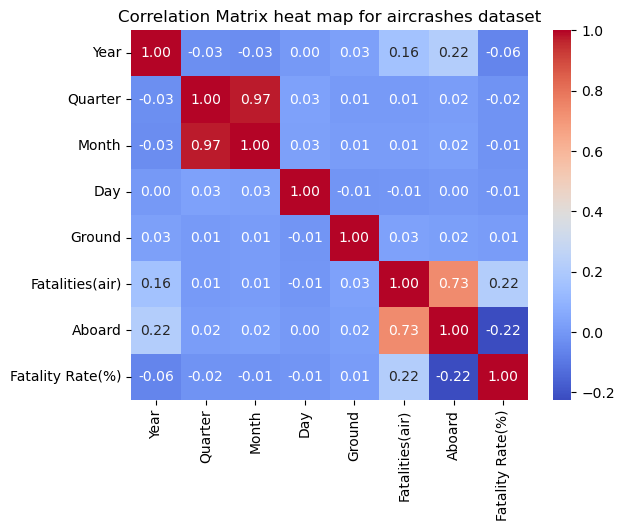

In [77]:
# heatmap

sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation Matrix heat map for aircrashes dataset")
plt.show()

**                       **
## RESEARCH QUESTIONS

#### 1. Number of Air crashes per year.

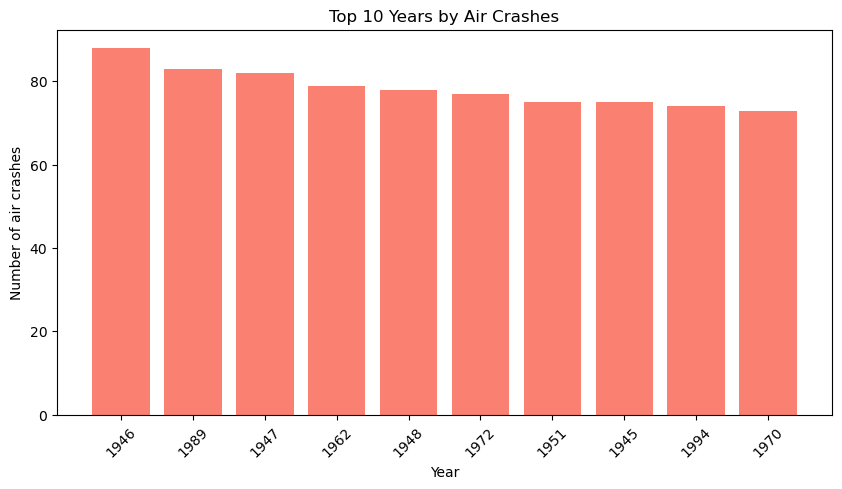

In [78]:
temp1 = df.groupby("Year").size().reset_index(name="Crash Count").sort_values(by="Crash Count", ascending=False).head(10)

plt.figure(figsize=(10,5))
plt.bar(temp1["Year"].astype(str), temp1["Crash Count"], color="salmon")  # converted year to string for categorical x-axis
plt.title("Top 10 Years by Air Crashes")
plt.xlabel("Year")
plt.ylabel("Number of air crashes")
plt.xticks(rotation=45)
plt.show()


#### 2. What is the trend of air crashes over time?

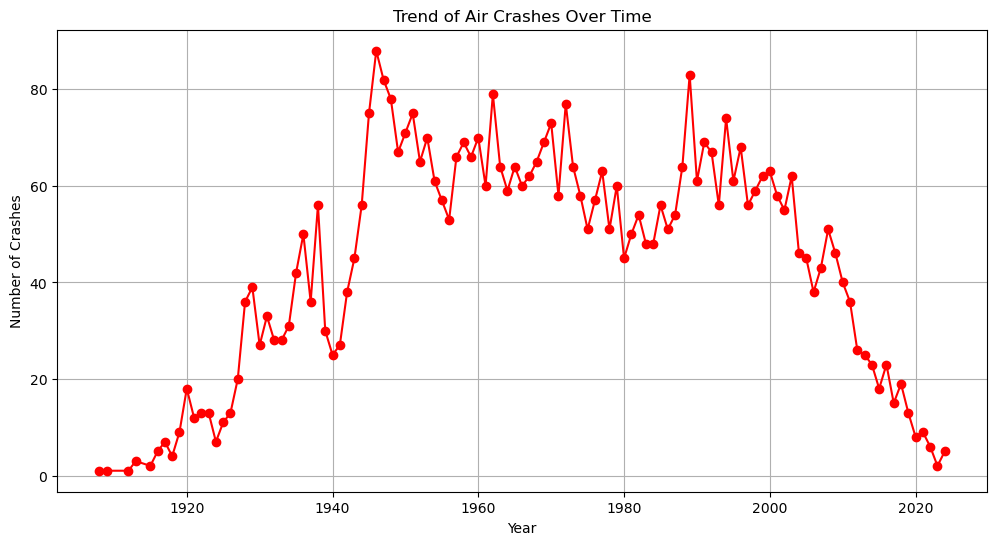

In [79]:
crash_trend = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(crash_trend.index, crash_trend.values, marker='o', color="red")
plt.title("Trend of Air Crashes Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Crashes")
plt.grid(True)
plt.show()


#### 3. Which countries recorded the highest number of crashes?

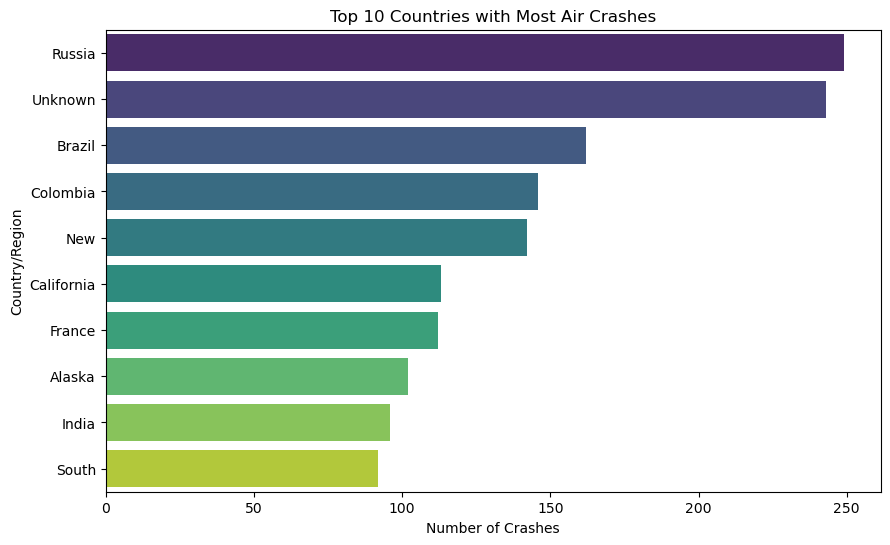

In [80]:
top_countries = df['Country/Region'].value_counts().head(10).reset_index()
top_countries.columns = ["Country/Region", "Crash Count"]

plt.figure(figsize=(10,6))
sns.barplot(
    x="Crash Count", 
    y="Country/Region", 
    data=top_countries, 
    hue="Country/Region", 
    palette="viridis", 
    legend=False
)
plt.title("Top 10 Countries with Most Air Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Country/Region")
plt.show()



#### 4. Which aircraft manufacturers are most involved in crashes?

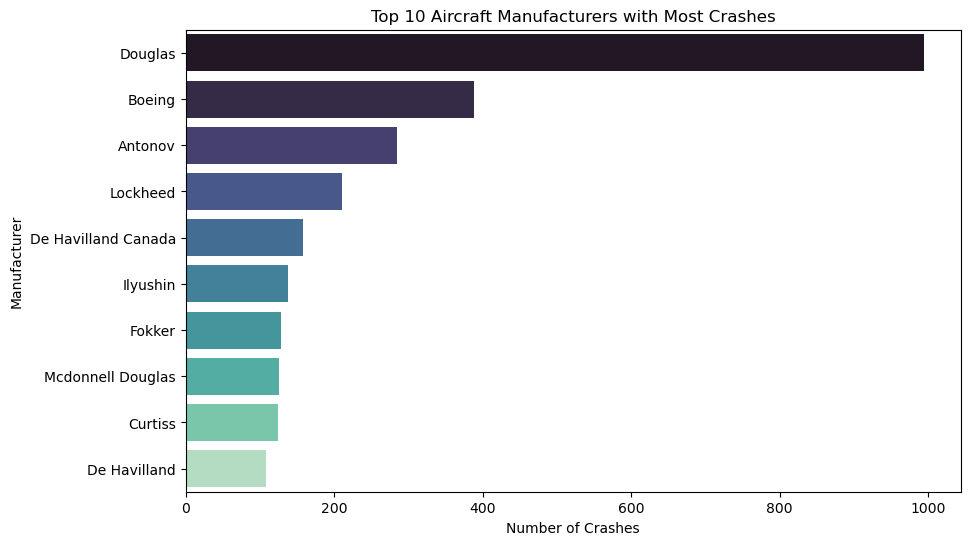

In [81]:
top_manufacturer = df['Aircraft Manufacturer'].value_counts().head(10).reset_index()
top_manufacturer.columns = ["Manufacturer", "Crash Count"]

plt.figure(figsize=(10,6))
sns.barplot(
    x="Crash Count",
    y="Manufacturer",
    data=top_manufacturer,
    hue="Manufacturer",   # assign hue
    palette="mako",
    legend=False          # hide redundant legend
)
plt.title("Top 10 Aircraft Manufacturers with Most Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Manufacturer")
plt.show()


#### 5. What is the average fatality rate by operator type?

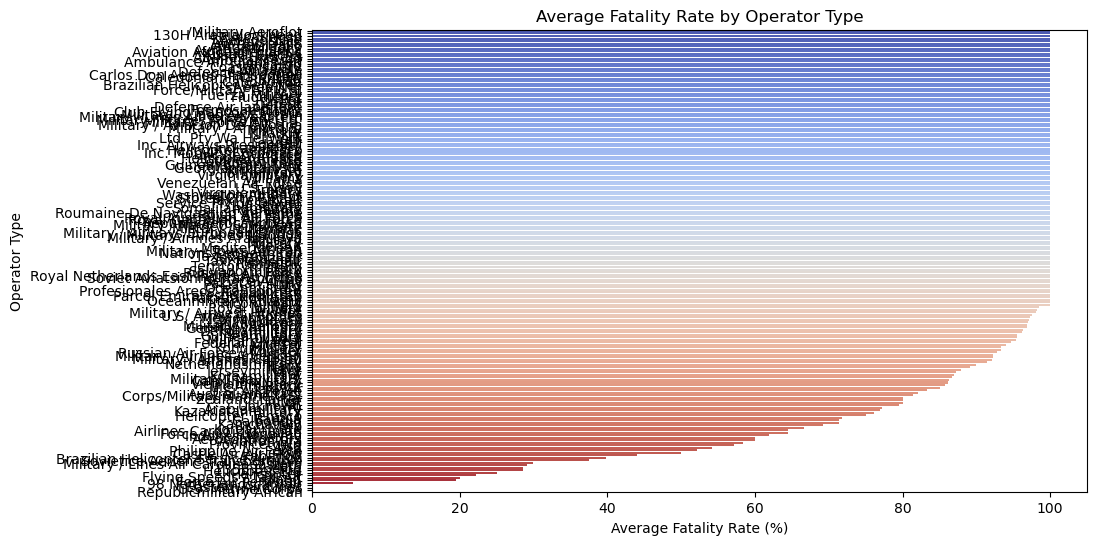

In [82]:
avg_fatality_operator = (
    df.groupby("Operator Type")["Fatality Rate(%)"]
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

plt.figure(figsize=(10,6))
sns.barplot(
    x="Fatality Rate(%)",
    y="Operator Type",
    data=avg_fatality_operator,
    hue="Operator Type",   # add hue
    palette="coolwarm",
    legend=False           # suppress legend
)
plt.title("Average Fatality Rate by Operator Type")
plt.xlabel("Average Fatality Rate (%)")
plt.ylabel("Operator Type")
plt.show()



#### 6. Which operators recorded the most crashes?

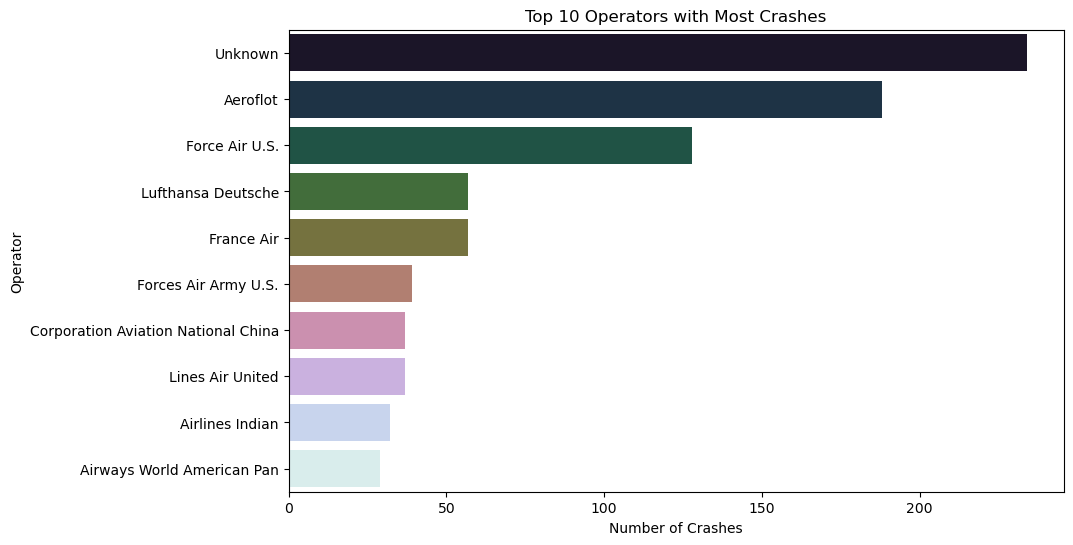

In [83]:
top_operators = df['Operator'].value_counts().head(10).reset_index()
top_operators.columns = ["Operator", "Crash Count"]

plt.figure(figsize=(10,6))
sns.barplot(
    x="Crash Count",
    y="Operator",
    data=top_operators,
    hue="Operator",      # assign hue
    palette="cubehelix",
    legend=False         # hide legend
)
plt.title("Top 10 Operators with Most Crashes")
plt.xlabel("Number of Crashes")
plt.ylabel("Operator")
plt.show()


#### 7. Which quarter of the year has the most crashes?

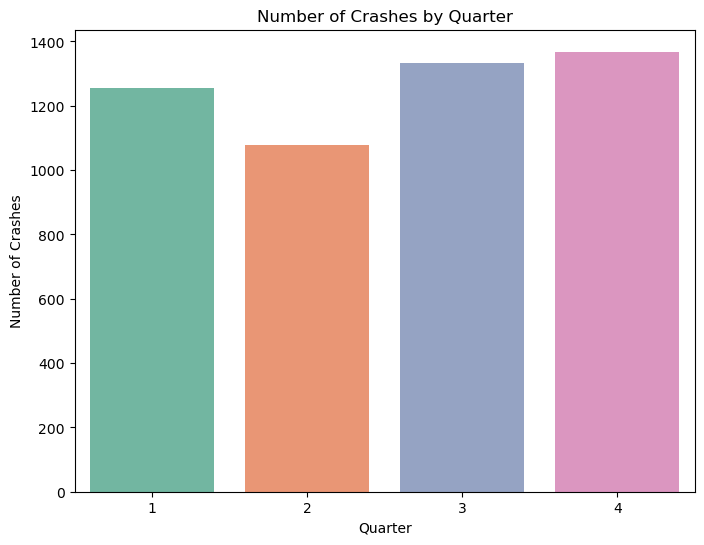

In [89]:
quarter_crashes = df['Quarter'].value_counts().sort_index().reset_index()
quarter_crashes.columns = ["Quarter", "Crash Count"]

plt.figure(figsize=(8,6))
sns.barplot(
    x="Quarter",
    y="Crash Count",
    data=quarter_crashes,
    hue="Quarter",      # add hue
    palette="Set2",
    legend=False        # hide legend
)
plt.title("Number of Crashes by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Number of Crashes")
plt.show()



#### 8. What is the total number of people aboard vs fatalities?

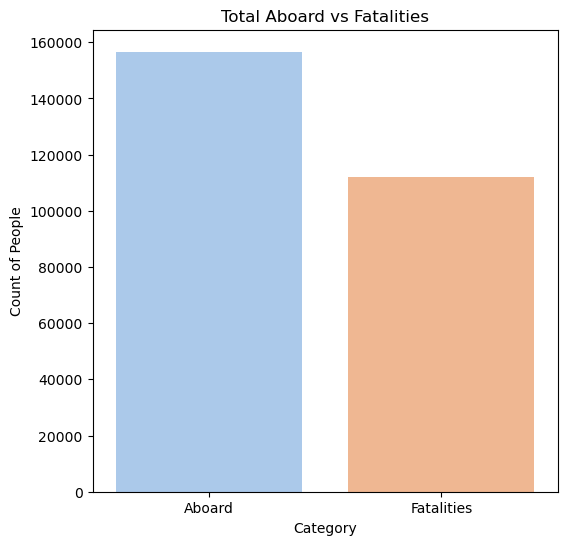

In [90]:
totals = {"Category": ["Aboard", "Fatalities"],
          "Count": [df['Aboard'].sum(), df['Fatalities(air)'].sum()]}

totals_df = pd.DataFrame(totals)

plt.figure(figsize=(6,6))
sns.barplot(
    x="Category",
    y="Count",
    data=totals_df,
    hue="Category",      # add hue
    palette="pastel",
    legend=False         # suppress legend
)
plt.title("Total Aboard vs Fatalities")
plt.ylabel("Count of People")
plt.show()



#### 9. Which decade recorded the highest fatalities?

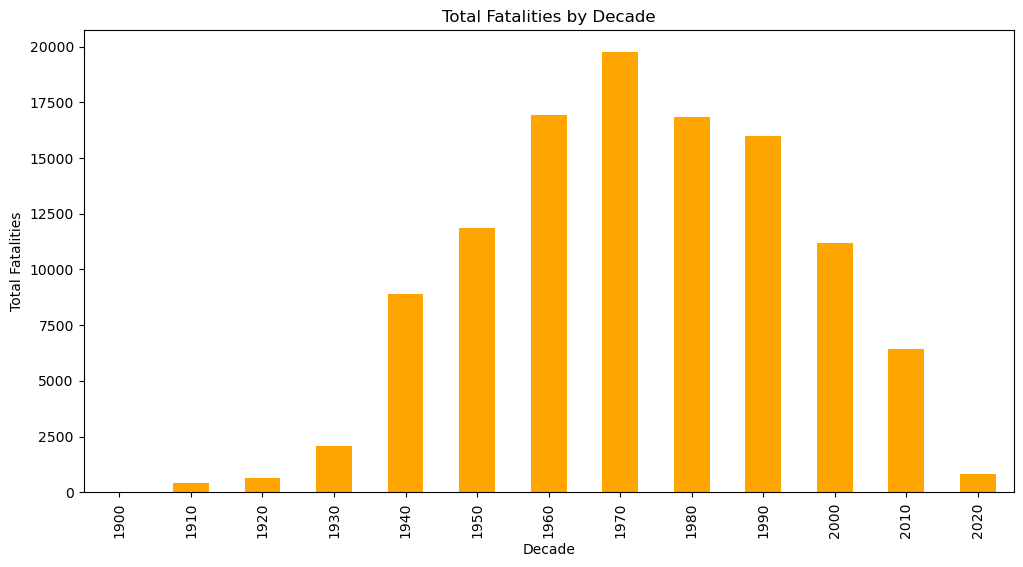

In [91]:
df['Decade'] = (df['Year'] // 10) * 10
fatalities_decade = df.groupby('Decade')["Fatalities(air)"].sum()

plt.figure(figsize=(12,6))
fatalities_decade.plot(kind='bar', color="orange")
plt.title("Total Fatalities by Decade")
plt.xlabel("Decade")
plt.ylabel("Total Fatalities")
plt.show()


#### 10. What are the top 10 deadliest crashes?

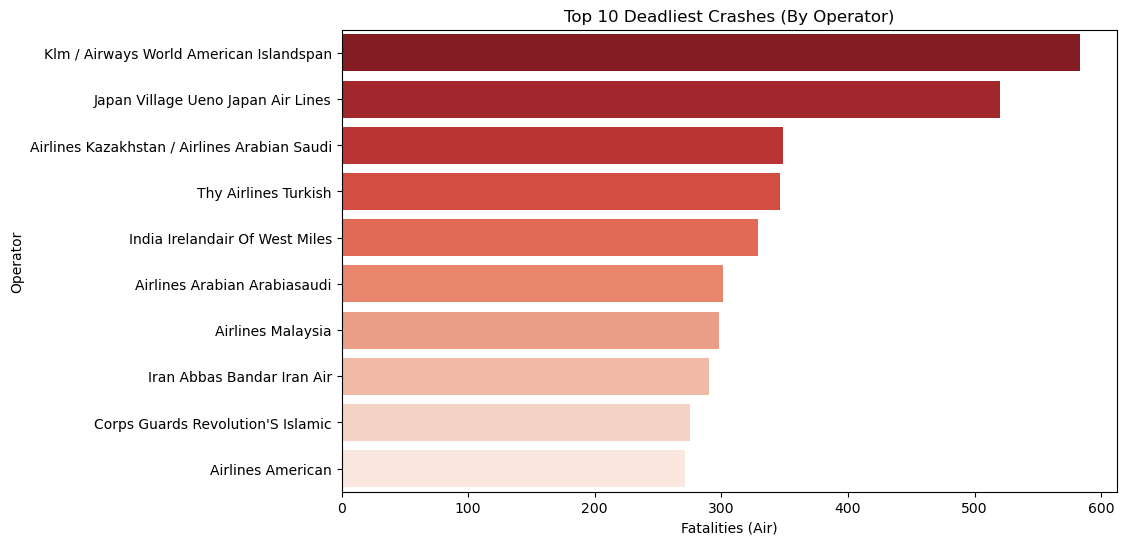

      Year Country/Region                     Aircraft  \
2912  1977         Canary                 Boeing B 747   
3352  1985           Near                 Boeing B 747   
4069  1996          India                 Boeing B 747   
2747  1974         France      Mcdonnell Douglas Dc 10   
3346  1985        Unknown                 Boeing B 747   
3103  1980          Saudi  Lockheed 1011 200 Tristarhz   
4907  2014        Ukraine           Boeing 777 2H6Er9M   
3510  1988           Near          Airbus A300B2 203Ep   
4445  2003           Iran           Ilyushin Il 76Md15   
3034  1979       Illinois      Mcdonnell Douglas Dc 10   

                                          Operator  Fatalities(air)  Aboard  
2912       Klm / Airways World American Islandspan              583     644  
3352            Japan Village Ueno Japan Air Lines              520     524  
4069  Airlines Kazakhstan / Airlines Arabian Saudi              349     349  
2747                          Thy Airlines Turkis

In [92]:
deadliest = df[['Year', 'Country/Region', 'Aircraft', 'Operator', 'Fatalities(air)', 'Aboard']]\
    .sort_values(by="Fatalities(air)", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(
    x="Fatalities(air)",
    y="Operator",
    data=deadliest,
    hue="Operator",      # assign hue
    palette="Reds_r",
    legend=False
)
plt.title("Top 10 Deadliest Crashes (By Operator)")
plt.xlabel("Fatalities (Air)")
plt.ylabel("Operator")
plt.show()

print(deadliest)


#### Exporting the clean data as an excel file

In [95]:
df.to_excel("aircrashes_data_cleaned.xlsx", index=False)

In [96]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator',
       'Operator Type', 'Ground', 'Fatalities(air)', 'Aboard',
       'Fatality Rate(%)', 'Decade'],
      dtype='object')

## **Findings**
**                       **

1. Crash Trends Over Time
    - The number of crashes fluctuated significantly across decades, with peaks in certain decades suggesting possible lapses in safety measures during those periods.
    - Recent decades showed a gradual decline, indicating that improvements in aviation technology and safety standards have had a positive effect.
      
2. Fatalities vs. Aboard
    - While the number of people aboard was generally high, the fatalities ratio varied widely depending on the severity of each crash.
    - Some crashes recorded almost all passengers aboard as fatalities, highlighting the catastrophic nature of certain accidents.

3. Country/Region Patterns
    - Crashes were not evenly distributed globally; some countries and regions recorded higher frequencies.
    - This may relate to factors such as weather conditions, air traffic density, regulatory enforcement, and infrastructure quality.

4. Operator Impact
    - Certain operators appeared more frequently in fatal crashes, showing patterns of either outdated fleets, poor maintenance culture, or weaker safety policies.
    - Well-established international operators generally had fewer accidents relative to smaller or less-regulated carriers.

5. Deadliest Crashes
    - The top 10 deadliest crashes were concentrated among a few operators and involved larger aircraft, often with a full passenger load.
    - These events accounted for disproportionately high fatalities compared to the total crash dataset.


## **Recommendations**
**                        **

1. Strengthen Aviation Regulations
    - Authorities should tighten monitoring of operators with repeated crash histories, enforcing stricter safety audits and compliance standards.

2. Modernize Aircraft Fleets
    - Governments and airline companies should phase out aging aircraft and invest in newer models equipped with advanced safety technologies.

3. Improve Training & Safety Culture
    - Regular training programs for pilots, engineers, and ground crew should be made mandatory.
    - Operators should also foster a stronger safety-first culture to reduce human error, one of the most common causes of accidents.

4. International Collaboration
    - Countries with higher crash records should collaborate with global aviation bodies (ICAO, IATA, FAA, EASA) to adopt best practices and improve safety standards.

5. Emergency Response Preparedness
    - Better crash response systems (rescue operations, fire response, medical aid) could help reduce fatalities when accidents occur.

6. Continuous Data Monitoring
    - Aviation authorities should maintain and update detailed crash datasets for ongoing analysis, helping detect patterns early and implement preventive strategies.